## Plots for experiments in finite regime

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import scipy
from src import utils
import copy
import pickle

In [2]:
# Set tex formatting for plots
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.serif"] = ["Computer Modern Roman"]

### Load and process data

In [3]:
def load_experiments(filename):
    f = open(filename, "rb")
    results = pickle.load(f)
    return results[0], results[1::]

def merge_runs(old, new, min_merge=False):
    if len(old) == len(new) or (len(old) < len(new) and min_merge):
        for i in range(len(old)):
            old[i] += new[i].copy()
    else:
        raise Exception("Cannot merge")
    return old

In [4]:
## February 6th experiments
filenames10 = [
"experiments/results_1581037908_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:1_finite:True_max_iter:50_n:10_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581038543_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:2_finite:True_max_iter:50_n:10_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581036360_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:3_finite:True_max_iter:50_n:10_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581037676_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:4_finite:True_max_iter:50_n:10_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581038242_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:5_finite:True_max_iter:50_n:10_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581038313_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:6_finite:True_max_iter:50_n:10_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581038394_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:7_finite:True_max_iter:50_n:10_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581037545_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:8_finite:True_max_iter:50_n:10_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581038775_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:9_finite:True_max_iter:50_n:10_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581037930_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:10_finite:True_max_iter:50_n:10_alpha:0.001_tag:cv_2feb6.pickle"
]

filenames100 = [
"experiments/results_1581036952_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:1_finite:True_max_iter:50_n:100_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581037402_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:2_finite:True_max_iter:50_n:100_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581036632_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:3_finite:True_max_iter:50_n:100_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581036772_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:4_finite:True_max_iter:50_n:100_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581036150_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:5_finite:True_max_iter:50_n:100_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581036392_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:6_finite:True_max_iter:50_n:100_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581037484_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:7_finite:True_max_iter:50_n:100_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581037313_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:8_finite:True_max_iter:50_n:100_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581037027_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:9_finite:True_max_iter:50_n:100_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581036501_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:10_finite:True_max_iter:50_n:100_alpha:0.001_tag:cv_2feb6.pickle"
]

filenames1000 = [
"experiments/results_1581036767_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:1_finite:True_max_iter:50_n:1000_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581037079_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:2_finite:True_max_iter:50_n:1000_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581036534_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:3_finite:True_max_iter:50_n:1000_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581038006_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:4_finite:True_max_iter:50_n:1000_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581037060_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:5_finite:True_max_iter:50_n:1000_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581037008_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:6_finite:True_max_iter:50_n:1000_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581037519_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:7_finite:True_max_iter:50_n:1000_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581036732_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:8_finite:True_max_iter:50_n:1000_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581037078_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:9_finite:True_max_iter:50_n:1000_alpha:0.001_tag:cv_2feb6.pickle",
"experiments/results_1581036966_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:30_runs:32_n_min:8_n_max:8_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:10_finite:True_max_iter:50_n:1000_alpha:0.001_tag:cv_2feb6.pickle"
]

## March 20th experiments (12 node graphs at level 0.001)

filenames10lvl001 = [
"experiments/results_1584806613_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:19_finite:True_max_iter:100_n:10_alpha:0.001_tag:mar20_10.pickle",
"experiments/results_1584804833_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:16_finite:True_max_iter:100_n:10_alpha:0.001_tag:mar20_10.pickle",
"experiments/results_1584793255_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:15_finite:True_max_iter:100_n:10_alpha:0.001_tag:mar20_10.pickle",
"experiments/results_1584799371_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:110_finite:True_max_iter:100_n:10_alpha:0.001_tag:mar20_10.pickle",
"experiments/results_1584827768_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:13_finite:True_max_iter:100_n:10_alpha:0.001_tag:mar20_10.pickle",
"experiments/results_1584809491_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:12_finite:True_max_iter:100_n:10_alpha:0.001_tag:mar20_10.pickle",
"experiments/results_1584810745_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:18_finite:True_max_iter:100_n:10_alpha:0.001_tag:mar20_10.pickle",
"experiments/results_1584811833_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:14_finite:True_max_iter:100_n:10_alpha:0.001_tag:mar20_10.pickle",
"experiments/results_1584883046_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:17_finite:True_max_iter:100_n:10_alpha:0.001_tag:mar20_10.pickle",
"experiments/results_1584917389_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:11_finite:True_max_iter:100_n:10_alpha:0.001_tag:mar20_10.pickle",
]

filenames100lvl001 = [
"experiments/results_1584757036_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:14_finite:True_max_iter:100_n:100_alpha:0.001_tag:mar20_100.pickle",
"experiments/results_1584786230_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:12_finite:True_max_iter:100_n:100_alpha:0.001_tag:mar20_100.pickle",
"experiments/results_1584786722_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:110_finite:True_max_iter:100_n:100_alpha:0.001_tag:mar20_100.pickle",
"experiments/results_1584787544_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:15_finite:True_max_iter:100_n:100_alpha:0.001_tag:mar20_100.pickle",
"experiments/results_1584790160_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:19_finite:True_max_iter:100_n:100_alpha:0.001_tag:mar20_100.pickle",
"experiments/results_1584791206_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:17_finite:True_max_iter:100_n:100_alpha:0.001_tag:mar20_100.pickle",
"experiments/results_1584792566_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:18_finite:True_max_iter:100_n:100_alpha:0.001_tag:mar20_100.pickle",
"experiments/results_1584799429_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:13_finite:True_max_iter:100_n:100_alpha:0.001_tag:mar20_100.pickle",
"experiments/results_1584805788_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:16_finite:True_max_iter:100_n:100_alpha:0.001_tag:mar20_100.pickle",
"experiments/results_1584807561_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:11_finite:True_max_iter:100_n:100_alpha:0.001_tag:mar20_100.pickle",
]

filenames1000lvl001 = [
"experiments/results_1584813074_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:11_finite:True_max_iter:100_n:1000_alpha:0.001_tag:mar20_1000.pickle",
"experiments/results_1584814519_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:12_finite:True_max_iter:100_n:1000_alpha:0.001_tag:mar20_1000.pickle",
"experiments/results_1584843338_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:15_finite:True_max_iter:100_n:1000_alpha:0.001_tag:mar20_1000.pickle",
"experiments/results_1584883624_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:14_finite:True_max_iter:100_n:1000_alpha:0.001_tag:mar20_1000.pickle",
"experiments/results_1584905477_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:17_finite:True_max_iter:100_n:1000_alpha:0.001_tag:mar20_1000.pickle",
"experiments/results_1584913072_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:18_finite:True_max_iter:100_n:1000_alpha:0.001_tag:mar20_1000.pickle",
"experiments/results_1584922492_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:13_finite:True_max_iter:100_n:1000_alpha:0.001_tag:mar20_1000.pickle",
"experiments/results_1584951197_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:110_finite:True_max_iter:100_n:1000_alpha:0.001_tag:mar20_1000.pickle",
"experiments/results_1585000881_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:16_finite:True_max_iter:100_n:1000_alpha:0.001_tag:mar20_1000.pickle",
"experiments/results_1585018773_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:19_finite:True_max_iter:100_n:1000_alpha:0.001_tag:mar20_1000.pickle",
]

## March 24th experiments (12 node graphs at level 0.0002)

filenames10lvl0002 = [
"experiments/results_1585165440_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:14_finite:True_max_iter:50_n:10_alpha:0.0002_tag:lvl1mar24_10.pickle",
"experiments/results_1585170769_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:16_finite:True_max_iter:50_n:10_alpha:0.0002_tag:lvl1mar24_10.pickle",
"experiments/results_1585171428_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:12_finite:True_max_iter:50_n:10_alpha:0.0002_tag:lvl1mar24_10.pickle",
"experiments/results_1585173425_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:11_finite:True_max_iter:50_n:10_alpha:0.0002_tag:lvl1mar24_10.pickle",
"experiments/results_1585198334_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:17_finite:True_max_iter:50_n:10_alpha:0.0002_tag:lvl1mar24_10.pickle",
"experiments/results_1585200065_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:110_finite:True_max_iter:50_n:10_alpha:0.0002_tag:lvl1mar24_10.pickle",
"experiments/results_1585205536_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:19_finite:True_max_iter:50_n:10_alpha:0.0002_tag:lvl1mar24_10.pickle",
"experiments/results_1585212214_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:18_finite:True_max_iter:50_n:10_alpha:0.0002_tag:lvl1mar24_10.pickle",
"experiments/results_1585235441_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:13_finite:True_max_iter:50_n:10_alpha:0.0002_tag:lvl1mar24_10.pickle",
"experiments/results_1585144773_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:15_finite:True_max_iter:50_n:10_alpha:0.0002_tag:lvl1mar24_10.pickle",
]

filenames100lvl0002 = [
"experiments/results_1585118288_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:14_finite:True_max_iter:50_n:100_alpha:0.0002_tag:lvl1mar24_100.pickle",
"experiments/results_1585121070_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:17_finite:True_max_iter:50_n:100_alpha:0.0002_tag:lvl1mar24_100.pickle",
"experiments/results_1585124533_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:13_finite:True_max_iter:50_n:100_alpha:0.0002_tag:lvl1mar24_100.pickle",
"experiments/results_1585127103_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:19_finite:True_max_iter:50_n:100_alpha:0.0002_tag:lvl1mar24_100.pickle",
"experiments/results_1585129390_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:15_finite:True_max_iter:50_n:100_alpha:0.0002_tag:lvl1mar24_100.pickle",
"experiments/results_1585133821_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:11_finite:True_max_iter:50_n:100_alpha:0.0002_tag:lvl1mar24_100.pickle",
"experiments/results_1585195247_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:110_finite:True_max_iter:50_n:100_alpha:0.0002_tag:mar24_100.pickle",
"experiments/results_1585146016_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:12_finite:True_max_iter:50_n:100_alpha:0.0002_tag:lvl1mar24_100.pickle",
"experiments/results_1585152057_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:18_finite:True_max_iter:50_n:100_alpha:0.0002_tag:lvl1mar24_100.pickle",
"experiments/results_1585163800_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:16_finite:True_max_iter:50_n:100_alpha:0.0002_tag:lvl1mar24_100.pickle",
]

filenames1000lvl0002 = [
"experiments/results_1585238125_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:12_finite:True_max_iter:50_n:1000_alpha:0.0002_tag:mar241000.pickle",
"experiments/results_1585242617_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:110_finite:True_max_iter:50_n:1000_alpha:0.0002_tag:mar241000.pickle",
"experiments/results_1585242663_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:14_finite:True_max_iter:50_n:1000_alpha:0.0002_tag:mar241000.pickle",
"experiments/results_1585269474_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:18_finite:True_max_iter:50_n:1000_alpha:0.0002_tag:mar241000.pickle",
"experiments/results_1585271801_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:17_finite:True_max_iter:50_n:1000_alpha:0.0002_tag:mar241000.pickle",
"experiments/results_1585275265_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:11_finite:True_max_iter:50_n:1000_alpha:0.0002_tag:mar241000.pickle",
"experiments/results_1585305260_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:15_finite:True_max_iter:50_n:1000_alpha:0.0002_tag:mar241000.pickle",
"experiments/results_1585309723_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:19_finite:True_max_iter:50_n:1000_alpha:0.0002_tag:mar241000.pickle",
"experiments/results_1585337793_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:13_finite:True_max_iter:50_n:1000_alpha:0.0002_tag:mar241000.pickle",
"experiments/results_1585357656_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:16_finite:True_max_iter:50_n:1000_alpha:0.0002_tag:mar241000.pickle"
]


## March 27th experiments (12 node graphs at level 0.01)

filenames10lvl01 = [
"experiments/results_1585376082_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:110_finite:True_max_iter:50_n:10_alpha:0.01_tag:mar2710.pickle",
"experiments/results_1585377963_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:17_finite:True_max_iter:50_n:10_alpha:0.01_tag:mar2710.pickle",
"experiments/results_1585380291_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:19_finite:True_max_iter:50_n:10_alpha:0.01_tag:mar2710.pickle",
"experiments/results_1585385606_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:18_finite:True_max_iter:50_n:10_alpha:0.01_tag:mar2710.pickle",
"experiments/results_1585391249_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:15_finite:True_max_iter:50_n:10_alpha:0.01_tag:mar2710.pickle",
"experiments/results_1585393715_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:14_finite:True_max_iter:50_n:10_alpha:0.01_tag:mar2710.pickle",
"experiments/results_1585397814_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:12_finite:True_max_iter:50_n:10_alpha:0.01_tag:mar2710.pickle",
"experiments/results_1585400618_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:16_finite:True_max_iter:50_n:10_alpha:0.01_tag:mar2710.pickle",
"experiments/results_1585409986_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:13_finite:True_max_iter:50_n:10_alpha:0.01_tag:mar2710.pickle",
"experiments/results_1585417273_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:11_finite:True_max_iter:50_n:10_alpha:0.01_tag:mar2710.pickle",
]

filenames100lvl01 = [
"experiments/results_1585324498_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:18_finite:True_max_iter:50_n:100_alpha:0.01_tag:mar27100.pickle",
"experiments/results_1585325679_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:13_finite:True_max_iter:50_n:100_alpha:0.01_tag:mar27100.pickle",
"experiments/results_1585337386_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:12_finite:True_max_iter:50_n:100_alpha:0.01_tag:mar27100.pickle",
"experiments/results_1585338938_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:15_finite:True_max_iter:50_n:100_alpha:0.01_tag:mar27100.pickle",
"experiments/results_1585340684_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:14_finite:True_max_iter:50_n:100_alpha:0.01_tag:mar27100.pickle",
"experiments/results_1585340797_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:17_finite:True_max_iter:50_n:100_alpha:0.01_tag:mar27100.pickle",
"experiments/results_1585342739_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:11_finite:True_max_iter:50_n:100_alpha:0.01_tag:mar27100.pickle",
"experiments/results_1585343526_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:19_finite:True_max_iter:50_n:100_alpha:0.01_tag:mar27100.pickle",
"experiments/results_1585344694_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:16_finite:True_max_iter:50_n:100_alpha:0.01_tag:mar27100.pickle",
"experiments/results_1585362465_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:110_finite:True_max_iter:50_n:100_alpha:0.01_tag:mar27100.pickle",
]

filenames1000lvl01 = [
"experiments/results_1585349539_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:14_finite:True_max_iter:50_n:1000_alpha:0.01_tag:mar271000.pickle",
"experiments/results_1585364334_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:12_finite:True_max_iter:50_n:1000_alpha:0.01_tag:mar271000.pickle",
"experiments/results_1585372753_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:110_finite:True_max_iter:50_n:1000_alpha:0.01_tag:mar271000.pickle",
"experiments/results_1585376046_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:17_finite:True_max_iter:50_n:1000_alpha:0.01_tag:mar271000.pickle",
"experiments/results_1585385014_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:18_finite:True_max_iter:50_n:1000_alpha:0.01_tag:mar271000.pickle",
"experiments/results_1585390383_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:13_finite:True_max_iter:50_n:1000_alpha:0.01_tag:mar271000.pickle",
"experiments/results_1585391833_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:19_finite:True_max_iter:50_n:1000_alpha:0.01_tag:mar271000.pickle",
"experiments/results_1585398511_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:11_finite:True_max_iter:50_n:1000_alpha:0.01_tag:mar271000.pickle",
"experiments/results_1585402514_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:15_finite:True_max_iter:50_n:1000_alpha:0.01_tag:mar271000.pickle",
"experiments/results_1585407121_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:16_finite:True_max_iter:50_n:1000_alpha:0.01_tag:mar271000.pickle",
]


In [5]:
def load_results(filenames):
    cases, results = load_experiments(filenames[0])
    for filename in filenames[1::]:
        print("Loading %s" % filename)
        new_cases, new_results = load_experiments(filename)
        cases += new_cases
        for k in range(len(results)):
            results[k] = merge_runs(results[k], new_results[k])
    print("\nLoaded a total of %d graphs with %d runs each" % (len(results[0][0]), len(results[0])))
    return cases, results

In [6]:
def hamming_distance(A,B,p):
    a = np.zeros(p)
    b = np.zeros(p)
    a[list(A)] = 1
    b[list(B)] = 1
    return scipy.spatial.distance.hamming(a, b)

In [7]:
def generate_trajectories(results, cases):
    runs = len(results[0])
    N = len(results[0][0])
    P = len(results)

    results = [results[i] for i in [0,3,1,2,4,5,6,7]]

    no_ints = np.zeros((len(results), runs, N))
    #all_trajectories_jac = {}
    all_trajectories_ham = {}
    all_type1_errors = {}
    names = []
    for k, policy_runs in enumerate(results):
        name = policy_runs[0][0].policy
        print("Processing results for %s policy" % name, end="")
        names.append(name)
        #trajectories_jac = []
        trajectories_ham = []
        type1_errors = []
        for i,run_results in enumerate(policy_runs):
            no_ints[k, i,:] = list(map(lambda result: len(result.interventions()), run_results))
            for j, result in enumerate(run_results):
                estimates = list(map(lambda step: step[0], result.history[0::])) + [result.estimate]
                #trajectory_jac = list(map(lambda estimate: jaccard_distance(cases[j].truth, estimate), estimates))
                trajectory_ham = list(map(lambda estimate: hamming_distance(cases[j].truth, estimate, cases[j].sem.p), estimates))
                type1_error = list(map(lambda estimate: set.issubset(estimate, cases[j].truth), estimates))
                #trajectories_jac.append(trajectory_jac)
                trajectories_ham.append(trajectory_ham)
                type1_errors.append(type1_error)
        #all_trajectories_jac[name] = trajectories_jac
        all_trajectories_ham[name] = trajectories_ham
        all_type1_errors[name] = type1_errors
        print(" done")
    return all_trajectories_ham, all_type1_errors, N, P, runs, names, no_ints

In [8]:
# Experiments to load
experiments = [
    filenames10lvl0002,
    filenames100lvl0002,
    filenames1000lvl0002,
    filenames10lvl001,
    filenames100lvl001,
    filenames1000lvl001,
    filenames10lvl01,
    filenames100lvl01,
    filenames1000lvl01]

Trajectories = []
Type1Errors = []
NoInts = []

for i,filenames in enumerate(experiments):
    print("\n\n %d/%d" % (i, len(experiments)), end=" ")
    cases, results = load_results(filenames)
    trajectories, type1_errors, N, P, runs, names, no_ints = generate_trajectories(results, cases)
    if i==0:
        prev_N, prev_P, prev_runs = N, P, runs
    elif prev_N != N or prev_P != P or prev_runs != runs:
        print(N, P, runs)
        print(prev_N, prev_P, prev_runs)
        raise Exception("Experiments have different number of graphs / policies / runs")
    Trajectories.append(trajectories)
    Type1Errors.append(type1_errors)
    NoInts.append(no_ints)




 0/9 Loading experiments/results_1585170769_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:16_finite:True_max_iter:50_n:10_alpha:0.0002_tag:lvl1mar24_10.pickle
Loading experiments/results_1585171428_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:12_finite:True_max_iter:50_n:10_alpha:0.0002_tag:lvl1mar24_10.pickle
Loading experiments/results_1585173425_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:11_finite:True_max_iter:50_n:10_alpha:0.0002_tag:lvl1mar24_10.pickle
Loading experiments/results_1585198334_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int


Loaded a total of 500 graphs with 32 runs each
Processing results for random policy done
Processing results for e + r policy done
Processing results for e policy done
Processing results for r policy done
Processing results for markov policy done
Processing results for markov + e policy done
Processing results for markov + r policy done
Processing results for markov + e + r policy done


 3/9 Loading experiments/results_1584804833_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:16_finite:True_max_iter:100_n:10_alpha:0.001_tag:mar20_10.pickle
Loading experiments/results_1584793255_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:15_finite:True_max_iter:100_n:10_alpha:0.001_tag:mar20_10.pickle
Loading experiments/results_1584799371_n_workers:-1_batch_size:2

Loading experiments/results_1585018773_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:19_finite:True_max_iter:100_n:1000_alpha:0.001_tag:mar20_1000.pickle

Loaded a total of 500 graphs with 32 runs each
Processing results for random policy done
Processing results for e + r policy done
Processing results for e policy done
Processing results for r policy done
Processing results for markov policy done
Processing results for markov + e policy done
Processing results for markov + r policy done
Processing results for markov + e + r policy done


 6/9 Loading experiments/results_1585377963_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:17_finite:True_max_iter:50_n:10_alpha:0.01_tag:mar2710.pickle
Loading experiments/results_1585380291_n_workers:-1_batch_size:

Loading experiments/results_1585407121_n_workers:-1_batch_size:20000_debug:False_avg_deg:3.0_G:50_runs:32_n_min:12_n_max:12_w_min:0.0_w_max:1.0_var_min:0.1_var_max:1.0_int_min:0.0_int_max:1.0_random_state:16_finite:True_max_iter:50_n:1000_alpha:0.01_tag:mar271000.pickle

Loaded a total of 500 graphs with 32 runs each
Processing results for random policy done
Processing results for e + r policy done
Processing results for e policy done
Processing results for r policy done
Processing results for markov policy done
Processing results for markov + e policy done
Processing results for markov + r policy done
Processing results for markov + e + r policy done


#### Set max. number of iterations to plot (eg. plot true positive recovery for the first 50 interventions)

In [9]:
max_iter = 50

**Summary of graphs used**

500 graphs in total


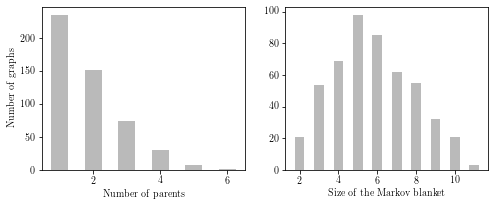

In [10]:
n_parents = np.zeros(N)
n_vars = np.zeros(N)
size_mb = np.zeros(N)
for i, case in enumerate(cases):
    n_parents[i] = len(case.truth)
    n_vars[i] = case.sem.p
    mb = utils.graph_info(case.target, case.sem.W)[3]
    size_mb[i] = len(mb)

def plot_hist(data, title):
    bins = np.arange(data.min(), data.max()+2)-0.5
    hist = plt.hist(data, bins, rwidth=0.5, align='mid', color="#BABABA")#colorsb[2])
    plt.xlabel(title)
    
plt.figure(figsize=(8,3))
#plt.subplot(131), plot_hist(n_vars, "Number of variables")
plt.subplot(121), plot_hist(n_parents, "Number of parents"), plt.ylabel("Number of graphs")
plt.subplot(122), plot_hist(size_mb, "Size of the Markov blanket")
print("%d graphs in total" % N)

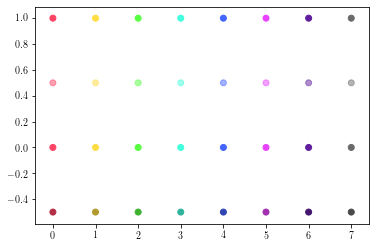

In [11]:
# Colors
def to_rgb(H, b=1, a=1):
    RGBa = []
    for h in H:
        h = h.lstrip("#")
        RGBa.append(tuple(int(h[i:i+2], 16) / 256 * b for i in (0, 2, 4)) + (a,))
    return np.array(RGBa)

cmap = matplotlib.cm.get_cmap('tab20')
base = ["#ff4365", "#ffdd43", "#59ff43", "#43ffdd", "#4365ff", "#e943ff", "#601e9e", "#6a6a6a"]#np.array([cmap(i) for i in range(2,20)])
plt.scatter(np.arange(len(base)), np.ones(len(base)), c = base)
#base = [base[i] for i in [0,1,3]]
colors = to_rgb(base)
colorsa = to_rgb(base, a=0.5)
colorsb = to_rgb(base, b=0.7)
plt.scatter(np.arange(len(colors)), np.zeros(len(colors)), c = colors)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*0.5, c = colorsa)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*-0.5, c = colorsb)

In [12]:
# Set legend size
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')

### Plots A: True Positive Recovery for `n=10`

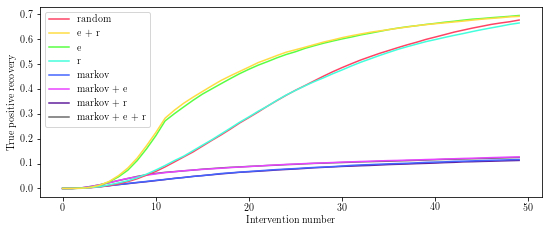

In [13]:
# Compute hamming distance
hm_dist = np.zeros((P, N*runs, max_iter+1))
for i, (name, trajectories) in enumerate(Trajectories[0].items()):
    for j, trajectory in enumerate(trajectories):
        hm_dist[i, j, 0:len(trajectory)] = trajectory
mean = np.mean(hm_dist[:, :, :]==0, axis=1)
plt.figure(figsize=(9,3.5))

# Plot trajectories
#plt.subplot(gs[0])
ax = plt.gca()
plot_iter = 50
x_axis = np.arange(0, plot_iter)
zorder = [1,4,2,3,-1,-2,-3,-4]
for i,name in enumerate(names):
    ax.plot(x_axis, mean[i,x_axis], label=name, linewidth=1.5, color=colors[i], zorder=zorder[i])    
plt.xlabel("Intervention number")
plt.ylabel("True positive recovery")
#axes.set_xticks(x_axis)
ax.legend(prop=fontP)

# Save figure
plt.savefig('figures/tpr_fin_10.pdf', bbox_inches='tight')

### Plots B: Number of interventions required

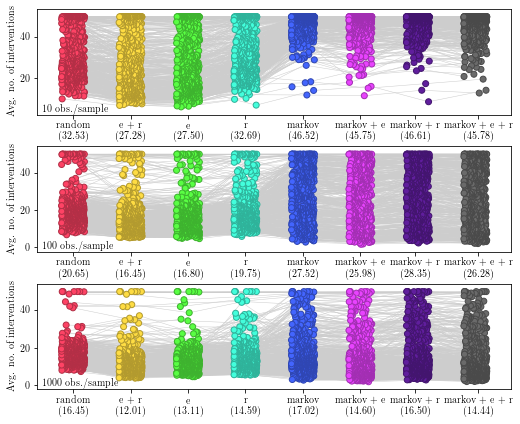

In [14]:
gs = gridspec.GridSpec(3, 1, wspace=0.10, hspace=0.3)
plt.figure(figsize=(8.5,7))

NoIntsAux = copy.deepcopy(NoInts)
for no_ints in NoIntsAux:
    no_ints[no_ints > max_iter] = max_iter

##############################
# n=10
plt.subplot(gs[0])
means = np.mean(NoIntsAux[0][:,:,:], axis=1)

dev = 0.2
xaxis = np.tile(np.arange(P), (N, 1)) - np.outer(np.linspace(-dev, dev, N), np.ones(P))
ecolor = "#cdcdcd"
for i in range(N):
    plt.plot(xaxis[i,:], means[:, i].T, color=ecolor, zorder=0, linewidth=0.5)
for i in range(N):
    plt.scatter(xaxis[i,:], means[:, i].T, marker="o", c=colors[0:P], zorder=1, edgecolors=colorsb)
plt.ylabel("Avg. no. of interventions")
ax = plt.gca()
ax.set_xticks([0,1,2,3,4,5,5.95,7.05])
total_averages = means.mean(axis=1)
labels = []
for i, avg in enumerate(total_averages):
    labels.append(names[i] + "\n(%0.2f)" % avg)
ax.set_xticklabels(labels, ha="center", rotation=0)
ax.text(0.01,0.027,"10 obs./sample", transform=ax.transAxes, fontsize=10, ha="left")

##############################
# n=100
plt.subplot(gs[1])
means = np.mean(NoIntsAux[1][:,:,:], axis=1)

dev = 0.2
xaxis = np.tile(np.arange(P), (N, 1)) - np.outer(np.linspace(-dev, dev, N), np.ones(P))
ecolor = "#cdcdcd"
for i in range(N):
    plt.plot(xaxis[i,:], means[:, i].T, color=ecolor, zorder=0, linewidth=0.5)
for i in range(N):
    plt.scatter(xaxis[i,:], means[:, i].T, marker="o", c=colors[0:P], zorder=1, edgecolors=colorsb)
plt.ylabel("Avg. no. of interventions")
ax = plt.gca()
ax.set_xticks([0,1,2,3,4,5,5.95,7.05])
total_averages = means.mean(axis=1)
labels = []
for i, avg in enumerate(total_averages):
    labels.append(names[i] + "\n(%0.2f)" % avg)
ax.set_xticklabels(labels, ha="center", rotation=0)
ax.text(0.01,0.027,"100 obs./sample", transform=ax.transAxes, fontsize=10, ha="left")

##############################
# n=1000
plt.subplot(gs[2])
means = np.mean(NoIntsAux[2][:,:,:], axis=1)

dev = 0.2
xaxis = np.tile(np.arange(P), (N, 1)) - np.outer(np.linspace(-dev, dev, N), np.ones(P))
ecolor = "#cdcdcd"
for i in range(N):
    plt.plot(xaxis[i,:], means[:, i].T, color=ecolor, zorder=0, linewidth=0.5)
for i in range(N):
    plt.scatter(xaxis[i,:], means[:, i].T, marker="o", c=colors[0:P], zorder=1, edgecolors=colorsb)
plt.ylabel("Avg. no. of interventions")
ax = plt.gca()
ax.set_xticks([0,1,2,3,4,5,5.95,7.05])
total_averages = means.mean(axis=1)
labels = []
for i, avg in enumerate(total_averages):
    labels.append(names[i] + "\n(%0.2f)" % avg)
ax.set_xticklabels(labels, ha="center", rotation=0)
ax.text(0.01,0.027,"1000 obs./sample", transform=ax.transAxes, fontsize=10, ha="left")

plt.savefig('figures/intervention_numbers_finite.pdf', bbox_inches='tight')

### Plots C1: Comparing effects of sample size

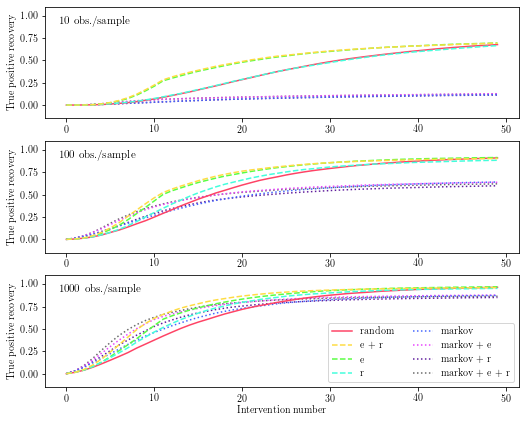

In [15]:
# Plot settings
gs = gridspec.GridSpec(3, 1, wspace=0.10, hspace=0.2)
plt.figure(figsize=(8.5,7))

plot_iter = 50
x_axis = np.arange(0, plot_iter)
ylim = [-0.15, 1.1]
linestyle = ['-', '--', '--', '--', ':', ':', ':', ':']
zorder = [1,4,2,3,-1,-2,-3,-4]

##############################
# Plot trajectories for n=10
hm_dist10 = np.zeros((P, N*runs, max_iter+1))
for i, trajectories in enumerate(Trajectories[0].values()):
    for j, trajectory in enumerate(trajectories):
        hm_dist10[i, j, 0:len(trajectory)] = trajectory
mean10 = np.mean(hm_dist10[:, :, :] ==0, axis=1)

plt.subplot(gs[0])
ax = plt.gca()
zorder = [1,4,2,3,-1,-2,-3,-4]
for i,name in enumerate(names):
    ax.plot(x_axis, mean10[i,x_axis], label=name, linewidth=1.5, linestyle = linestyle[i], color=colors[i], zorder=zorder[i])
plt.ylabel("True positive recovery")
#axes.set_xticks(x_axis)
#ax.legend(prop=fontP)
ax.text(0.03,0.85,"10 obs./sample", transform=ax.transAxes, fontsize=11, ha="left")
plt.ylim(ylim)
#ax.legend(prop=fontP)

##############################
# Plot trajectories for n=100
hm_dist100 = np.zeros((P, N*runs, max_iter+1))
for i, (name, trajectories) in enumerate(Trajectories[1].items()):
    for j, trajectory in enumerate(trajectories):
        hm_dist100[i, j, 0:len(trajectory)] = trajectory
mean100 = np.mean(hm_dist100[:, :, :] == 0, axis=1)
plt.subplot(gs[1])
ax = plt.gca()
for i,name in enumerate(names):
    ax.plot(x_axis, mean100[i,x_axis], label=name, linewidth=1.5, linestyle = linestyle[i], color=colors[i], zorder=zorder[i])
plt.ylabel("True positive recovery")
#ax.set_yticklabels([])
#axes.set_xticks(x_axis)
ax.text(0.03,0.85,"100 obs./sample", transform=ax.transAxes, fontsize=11, ha="left")
plt.ylim(ylim)
#ax.legend(prop=fontP)

##############################
# Plot trajectories for n=1000
hm_dist1000 = np.zeros((P, N*runs, max_iter+1))
for i, (name, trajectories) in enumerate(Trajectories[2].items()):
    for j, trajectory in enumerate(trajectories):
        hm_dist1000[i, j, 0:len(trajectory)] = trajectory
mean1000 = np.mean(hm_dist1000[:, :, :] == 0, axis=1)

plt.subplot(gs[2])
ax = plt.gca()
for i,name in enumerate(names):
    ax.plot(x_axis, mean1000[i,x_axis], label=name, linewidth=1.5, linestyle = linestyle[i], color=colors[i], zorder=zorder[i])
plt.xlabel("Intervention number")
plt.ylabel("True positive recovery")
#axes.set_xticks(x_axis)
#ax.legend(prop=fontP)
ax.text(0.03,0.85,"1000 obs./sample", transform=ax.transAxes, fontsize=11, ha="left")
plt.ylim(ylim)

ax.legend(prop=fontP, ncol=2)
plt.savefig('figures/tpr_finite_large.pdf', bbox_inches='tight')

### Plots C2: Comparing effects of sample size

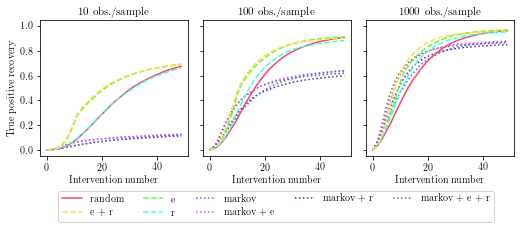

In [16]:
# Plot settings
gs = gridspec.GridSpec(1, 3, wspace=0.10, hspace=0.2)
plt.figure(figsize=(8.5,2.5))

plot_iter = 50
x_axis = np.arange(0, plot_iter)
ylim = [-0.05, 1.05]
linestyle = ['-', '--', '--', '--', ':', ':', ':', ':']
zorder = [1,4,2,3,-1,-2,-3,-4]

##############################
# Plot trajectories for n=10
hm_dist10 = np.zeros((P, N*runs, max_iter+1))
for i, trajectories in enumerate(Trajectories[0].values()):
    for j, trajectory in enumerate(trajectories):
        hm_dist10[i, j, 0:len(trajectory)] = trajectory
mean10 = np.mean(hm_dist10[:, :, :] ==0, axis=1)

plt.subplot(gs[0])
ax = plt.gca()
zorder = [1,4,2,3,-1,-2,-3,-4]
for i,name in enumerate(names):
    ax.plot(x_axis, mean10[i,x_axis], label=name, linewidth=1.5, linestyle = linestyle[i], color=colors[i], zorder=zorder[i])
plt.xlabel("Intervention number")
plt.ylabel("True positive recovery")
ax.text(0.5,1.04,"10 obs./sample", transform=ax.transAxes, fontsize=11, ha="center")
plt.ylim(ylim)

##############################
# Plot trajectories for n=100
hm_dist100 = np.zeros((P, N*runs, max_iter+1))
for i, (name, trajectories) in enumerate(Trajectories[1].items()):
    for j, trajectory in enumerate(trajectories):
        hm_dist100[i, j, 0:len(trajectory)] = trajectory
mean100 = np.mean(hm_dist100[:, :, :] == 0, axis=1)
plt.subplot(gs[1])
ax = plt.gca()
for i,name in enumerate(names):
    ax.plot(x_axis, mean100[i,x_axis], label=name, linewidth=1.5, linestyle = linestyle[i], color=colors[i], zorder=zorder[i])
plt.xlabel("Intervention number")
ax.set_yticklabels([])
#axes.set_xticks(x_axis)
ax.text(0.5,1.04,"100 obs./sample", transform=ax.transAxes, fontsize=11, ha="center")
plt.ylim(ylim)

##############################
# Plot trajectories for n=1000
hm_dist1000 = np.zeros((P, N*runs, max_iter+1))
for i, (name, trajectories) in enumerate(Trajectories[2].items()):
    for j, trajectory in enumerate(trajectories):
        hm_dist1000[i, j, 0:len(trajectory)] = trajectory
mean1000 = np.mean(hm_dist1000[:, :, :] == 0, axis=1)

plt.subplot(gs[2])
ax = plt.gca()
for i,name in enumerate(names):
    ax.plot(x_axis, mean1000[i,x_axis], label=name, linewidth=1.5, linestyle = linestyle[i], color=colors[i], zorder=zorder[i])
plt.xlabel("Intervention number")
ax.set_yticklabels([])
ax.text(0.5,1.04,"1000 obs./sample", transform=ax.transAxes, fontsize=11, ha="center")
plt.ylim(ylim)

ax.legend(prop=fontP, ncol=5, bbox_to_anchor=(0.9, -.22))
plt.savefig('figures/tpr_finite.pdf', bbox_inches='tight')

### Plot D: Sensitivity analysis

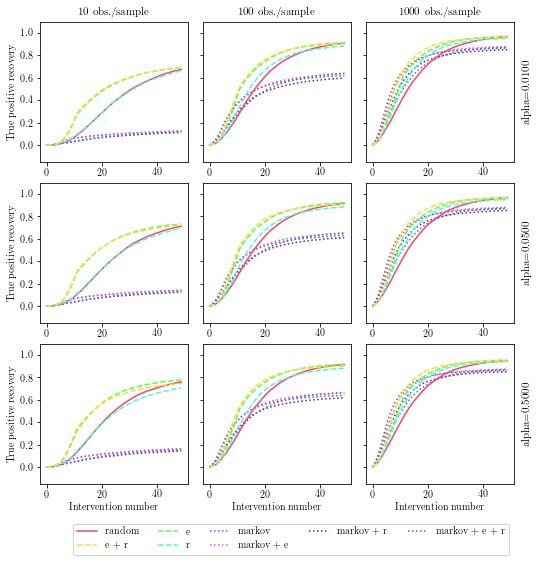

In [17]:
# Plot settings
gs = gridspec.GridSpec(3, 3, wspace=0.10, hspace=0.15)
plt.figure(figsize=(8.5,8.5))

plot_iter = 50
x_axis = np.arange(0, plot_iter)
ylim = [-0.15, 1.1]
linestyle = ['-', '--', '--', '--', ':', ':', ':', ':']
zorder = [1,4,2,3,-1,-2,-3,-4]
levels = [0.0002, 0.001, 0.01]

##############################
# Plot trajectories for n=10
for i, all_trajectories in enumerate(Trajectories):
    print("Plotting %d/%d" % (i+1, len(Trajectories)), end="\r")
    hm_dist = np.zeros((P, N*runs, max_iter+1))
    for j, policy_trajectories in enumerate(all_trajectories.values()):
        for k, trajectory in enumerate(policy_trajectories):
            n = min(plot_iter, len(trajectory))
            hm_dist[j, k, 0:n] = trajectory[0:n]
    mean = np.mean(hm_dist == 0, axis=1)
    plt.subplot(gs[i])
    ax = plt.gca()
    # Plot TPR for each policy
    for j,name in enumerate(names):
        ax.plot(x_axis, mean[j,x_axis], label=name, linewidth=1.5, linestyle = linestyle[j], color=colors[j], zorder=zorder[j])    
    
    # Labels / legend
    level = levels[int(i/3)]*max_iter
    if i < 3:
        ax.text(0.5,1.05,"%d obs./sample" % (10**(i % 3 + 1)), transform=ax.transAxes, fontsize=11, ha="center")
    if i % 3 == 2:
        ax.text(1.05,0.5,"alpha=%0.4f" % level, transform=ax.transAxes, fontsize=11, va="center", rotation=90)
    ax.set_yticklabels([]) if i % 3 != 0 else None
    plt.ylim(ylim)
    plt.ylabel("True positive recovery") if i % 3 == 0 else None
    plt.xlabel("Intervention number") if i >= 6 else None
ax.legend(prop=fontP, ncol=5, bbox_to_anchor=(1, -.25))
plt.savefig('figures/sensitivity.pdf', bbox_inches='tight')

### Plot E: Type-1 error rate

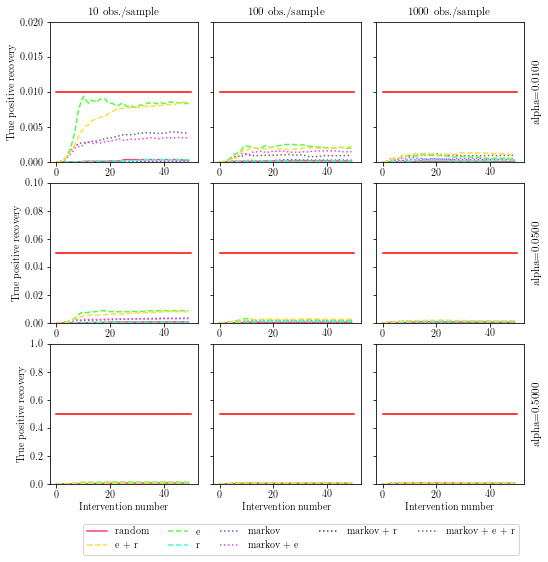

In [18]:
# Plot settings
gs = gridspec.GridSpec(3, 3, wspace=0.10, hspace=0.15)
plt.figure(figsize=(8.5,8.5))

plot_iter = 50
x_axis = np.arange(0, plot_iter)
ylim = [0, 0.05]
linestyle = ['-', '--', '--', '--', ':', ':', ':', ':']
zorder = [1,4,2,3,-1,-2,-3,-4]
levels = [0.0002, 0.001, 0.01]

##############################
# Plot trajectories for n=10
for i, all_type1_errors in enumerate(Type1Errors):
    print("Plotting %d/%d" % (i+1, len(Type1Errors)), end="\r")
    errors = np.ones((P, N*runs, max_iter+1))
    for j, policy_errors in enumerate(all_type1_errors.values()):
        for k, error_trajectory in enumerate(policy_errors):
            n = min(plot_iter, len(error_trajectory))
            errors[j, k, 0:n] = error_trajectory[0:n]
    mean = np.mean(1 - errors, axis=1)
    plt.subplot(gs[i])
    ax = plt.gca()
    # Plot TPR for each policy
    for j,name in enumerate(names):
        ax.plot(x_axis, mean[j,x_axis], label=name, linewidth=1.5, linestyle = linestyle[j], color=colors[j], zorder=zorder[j])    
    level = levels[int(i/3)]*max_iter
    plt.plot([0,50], [level, level], color="red")
    # Labels / legend
    if i < 3:
        ax.text(0.5,1.05,"%d obs./sample" % (10**(i % 3 + 1)), transform=ax.transAxes, fontsize=11, ha="center")
    if i % 3 == 2:
        ax.text(1.05,0.5,"alpha=%0.4f" % level, transform=ax.transAxes, fontsize=11, va="center", rotation=90)
    ax.set_yticklabels([]) if i % 3 != 0 else None
    plt.ylim([0, level*2])
    plt.ylabel("True positive recovery") if i % 3 == 0 else None
    plt.xlabel("Intervention number") if i >= 6 else None
ax.legend(prop=fontP, ncol=5, bbox_to_anchor=(1, -.25))
plt.savefig('figures/type1error.pdf', bbox_inches='tight')